In [5]:
import pandas as pd

df = pd.read_csv('../data/pwt100-portugal.csv')
df_portugal = df[df['country'] == 'Portugal']
df_portugal

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
9520,PRT,Portugal,Euro,1950,23896.43750,24053.72070,8.076016,3.048248,2404.899411,1.241877,...,0.103041,-0.166272,0.013026,0.071216,0.085901,0.081298,0.061486,0.061893,0.056937,NaN
9521,PRT,Portugal,Euro,1951,26306.45117,26822.42969,8.121452,3.046919,2389.619178,1.247894,...,0.104751,-0.156813,0.024126,0.071312,0.088757,0.079132,0.078459,0.073410,0.061004,NaN
9522,PRT,Portugal,Euro,1952,27230.55859,27907.45508,8.155697,3.041210,2374.436033,1.253940,...,0.084727,-0.142615,0.016163,0.071170,0.086619,0.078144,0.085202,0.080932,0.060233,NaN
9523,PRT,Portugal,Euro,1953,29012.89258,29308.79883,8.206299,3.041408,2359.349358,1.260015,...,0.075252,-0.136351,0.012254,0.071761,0.088318,0.077847,0.085712,0.076986,0.060901,NaN
9524,PRT,Portugal,Euro,1954,30576.77539,30559.67383,8.257141,3.041463,2344.358541,1.266120,...,0.082734,-0.150018,0.017561,0.069977,0.085038,0.078055,0.086577,0.072554,0.057964,0.996641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9585,PRT,Portugal,Euro,2015,314019.62500,297096.65630,10.368351,4.608300,1878.601650,2.444253,...,0.288696,-0.406413,0.066918,0.685197,0.504855,0.618838,0.644685,0.556657,0.346531,0.412426
9586,PRT,Portugal,Euro,2016,323220.96880,304108.81250,10.325538,4.678264,1884.829651,2.461201,...,0.283781,-0.399243,0.072464,0.694380,0.495281,0.628589,0.639874,0.558165,0.326197,0.398794
9587,PRT,Portugal,Euro,2017,332017.50000,313080.18750,10.288527,4.826374,1873.619081,2.478266,...,0.301004,-0.436005,0.085218,0.727460,0.514956,0.654630,0.659146,0.576876,0.361262,0.424819
9588,PRT,Portugal,Euro,2018,341520.65630,317162.25000,10.256193,4.931155,1867.852012,2.495449,...,0.337617,-0.499735,0.093328,0.772801,0.560450,0.698739,0.691340,0.602474,0.396989,0.431016


/var/folders/rf/nrr7tl9d431gh1tw7_1tq1s80000gn/T/ipykernel_38580/2600810080.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_portugal['gdp_per_capita'] = df_portugal['rgdpe'] / df_portugal['pop']
/var/folders/rf/nrr7tl9d431gh1tw7_1tq1s80000gn/T/ipykernel_38580/2600810080.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_portugal['ln_gdp'] = np.log(df_portugal['rgdpe'])
/var/folders/rf/nrr7tl9d431gh1tw7_1tq1s80000gn/T/ipykernel_38580/2600810080.py:9: SettingWithCopyWarning: 
A value is trying to b

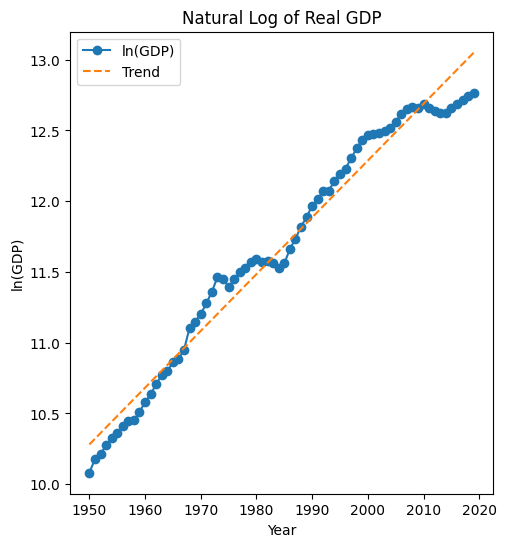

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

df_portugal['gdp_per_capita'] = df_portugal['rgdpe'] / df_portugal['pop']
# Calculate natural logs
df_portugal['ln_gdp'] = np.log(df_portugal['rgdpe'])
df_portugal['ln_gdp_per_capita'] = np.log(df_portugal['gdp_per_capita'])

# Perform linear regression to find trends
def calculate_trend(x, y):
    slope, intercept, _, _, _ = linregress(x, y)
    trend = intercept + slope * x
    return trend

# Create year column for regression
x = df_portugal['year']

# Trends for ln_gdp and ln_gdp_per_capita
df_portugal['trend_ln_gdp'] = calculate_trend(x, df_portugal['ln_gdp'])
df_portugal['trend_ln_gdp_per_capita'] = calculate_trend(x, df_portugal['ln_gdp_per_capita'])

# Plot natural log of GDP and its trend
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df_portugal['year'], df_portugal['ln_gdp'], label='ln(GDP)', marker='o')
plt.plot(df_portugal['year'], df_portugal['trend_ln_gdp'], label='Trend', linestyle='--')
plt.title('Natural Log of Real GDP')
plt.xlabel('Year')
plt.ylabel('ln(GDP)')
plt.legend()